In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
from scipy import stats

In [2]:
%matplotlib inline

In [5]:
df = pd.read_csv('sunglass_hut.csv')
df.price = df.price.str.replace(',','').astype('float')
df.list_price = df.list_price.str.replace(',','').astype('float')

In [6]:
df.shape

(3966, 15)

# Word Cloud

In [11]:
descriptions = df[['description']]
# sunglasses_mask = np.array(Image.open('sunglasses.png'))
# stopwords = set(STOPWORDS)
descriptions = pd.Series(descriptions.description.unique())[1:]
descriptions = descriptions.str.lower()
descriptions = descriptions.apply(lambda x: re.sub('ray', '', x))
descriptions = descriptions.apply(lambda x: re.sub('ban', '', x))
descriptions = descriptions.apply(lambda x: re.sub('come', '', x))
descriptions = descriptions.apply(lambda x: re.sub('frame', '', x))

In [12]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc.generate(' '.join(descriptions[1:]))

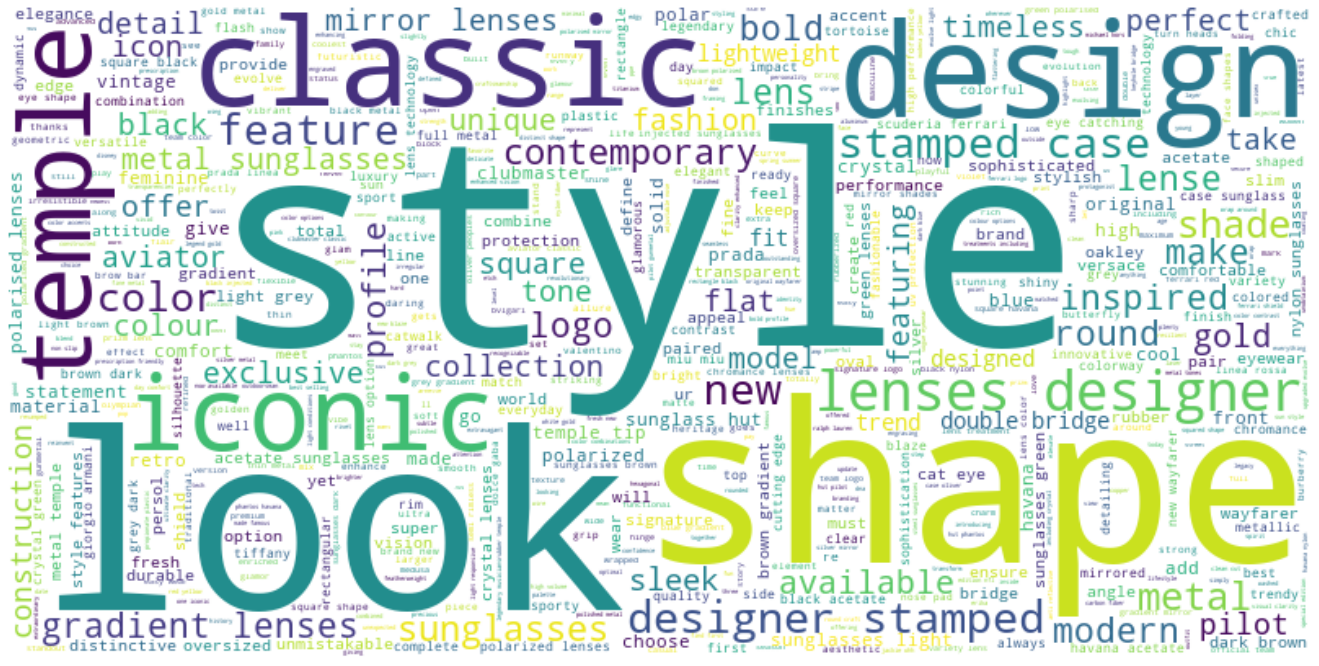

In [13]:
plt.figure(figsize = (24,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# What are the most expensive brands?

In [14]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)

In [21]:
from plotly.graph_objs import Bar, Figure, Histogram, Layout

df_price_brands = df.groupby('brand')['price'].median().sort_values(ascending=False).reset_index()

data = [Bar(x=df_price_brands['brand'], y=df_price_brands['price'], text=df_price_brands['brand'])]
layout = Layout(title="Brands by Median Price (dollars)", yaxis = None)

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

# What are the most expensive pairs?

In [24]:
pd.set_option('display.max_colwidth', 80)

In [26]:
df.sort_values(by = 'price', ascending = False).head(20)

,brand,description,face_shape,frame_color,frame_material,lens_color,lens_material,lens_technology,list_price,name,polarized,price,shape,upc,url
288,Bvlgari,NaN,"Oval, Round",Silver,Gold,Grey-Black,Not Glass,Solid Color,1570.0,BV5031TG Octo,False,1570.0,Rectangle,8053672289961,https://www.sunglasshut.com/us/bulgari/bv5031tg-8053672289961
2147,Bvlgari,NaN,"Oval, Round",Tortoise,Acetate,Brown,Not Glass,Gradient,943.0,BV8205KB Serpenti,True,943.0,Square,8053672905236,https://www.sunglasshut.com/us/bulgari/bv8205kb-8053672905236
2105,Bvlgari,NaN,"Oval, Round",Black,Acetate,Grey-Black,Not Glass,Gradient,943.0,BV8205KB Serpenti,True,943.0,Square,8053672905199,https://www.sunglasshut.com/us/bulgari/bv8205kb-8053672905199
2171,Bvlgari,NaN,"Oval, Heart, Square",Black,Metal,Grey-Black,Not Glass,Gradient,943.0,BV6121KB Serpenti,True,943.0,Pilot,8056597070447,https://www.sunglasshut.com/us/bulgari/bv6121kb-8056597070447
2170,Bvlgari,NaN,"Oval, Heart, Square",Gold,Metal,Brown,Not Glass,Gradient,943.0,BV6121KB Serpenti,True,943.0,Pilot,8056597070461,https://www.sunglasshut.com/us/bulgari/bv6121kb-8056597070461
3787,Bvlgari,Glowing jewel-tones and ultra-fine golden metal lines define the sinuous pro...,"Oval, Heart, Square, Round",Black,Metal,Grey-Black,Not Glass,Gradient,893.0,BV6144KB,False,893.0,Irregular,8056597226981,https://www.sunglasshut.com/us/bulgari/bv6144kb-8056597226981
3799,Bvlgari,NaN,"Oval, Heart, Square, Round",Gold,Metal,Violet,Not Glass,Solid Color - Mirror,893.0,BV6144KB,False,893.0,Irregular,8056597226974,https://www.sunglasshut.com/us/bulgari/bv6144kb-8056597226974
2749,Bvlgari,NaN,"Oval, Square",Gold,Metal,Grey-Black,Not Glass,Gradient,893.0,BV6129KB Le Gemme,False,893.0,Cat Eye,8056597115131,https://www.sunglasshut.com/us/bulgari/bv6129kb-8056597115131
2348,Bvlgari,NaN,"Oval, Round",Gold,Steel,Brown,Not Glass,Solid Color,807.0,BV5048K A,True,807.0,Square,8053672964462,https://www.sunglasshut.com/us/bulgari/bv5048k-8053672964462
3461,Gucci,NaN,"Oval, Heart, Square, Round",Gold,Metal,Pink,Not Glass,Mirror,725.0,Gg0666s,False,725.0,Irregular,889652279107,https://www.sunglasshut.com/us/gucci/gc001380-889652279107


In [42]:
df_brands2 = pd.DataFrame(df.brand.value_counts())
df_brands2.reset_index(inplace = True)
df_brands2.columns = ['brand', 'count']
df_brands2


,brand,count
0,Ray-Ban,799
1,Oakley,468
2,Vogue,305
3,Prada,188
4,Costa,138
5,Versace,129
6,Dolce & Gabbana,125
7,Maui Jim,116
8,Burberry,113
9,Giorgio Armani,112


In [43]:
data = [Bar(x=df_brands2['brand'], y=df_brands2['count'], text=df_brands2['brand'])]
layout = Layout(title="Number of pairs available by brand", yaxis = None)

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

In [58]:
brands = ['Ray-Ban', 'Oakley', 'Vogue', 'Prada', 'Gucci', 'Prada Linea Rossa']
df_brands = df[df['brand'].isin(brands)]
df_brands.loc[df.brand == 'Prada Linea Rossa', 'brand'] = 'Prada'
df_brands['brand'].value_counts()

Ray-Ban    799
Oakley     468
Vogue      305
Prada      249
Gucci       90
Name: brand, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb07b07a8e0>,
      dtype=object)

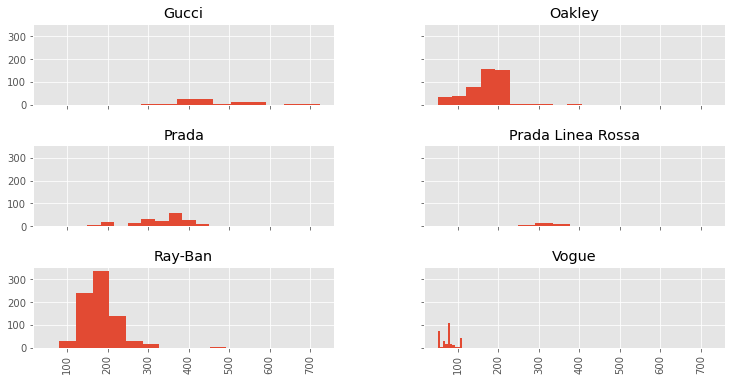

In [44]:
df_brands.price.hist(by = df_brands.brand, sharex = True, sharey = True, figsize = (12,6))

In [59]:
df_brands3 = pd.DataFrame(df_brands.brand.value_counts())
df_brands3.reset_index(inplace = True)
df_brands3.columns = ['brand', 'count']
df_brands3

,brand,count
0,Ray-Ban,799
1,Oakley,468
2,Vogue,305
3,Prada,249
4,Gucci,90


In [60]:
    data = [Bar(x=df_brands3['brand'], y=df_brands3['count'], text=df_brands3['brand'])]
    layout = Layout(title="Number of pairs available by brand", yaxis = None)

    fig = Figure(data=data, layout=layout)

    plotly.offline.iplot(fig,show_link=False)

In [61]:

df_price_brands2 = df_brands.groupby('brand')['price'].median().sort_values(ascending=False).reset_index()
data = [Bar(x=df_price_brands2['brand'], y=df_price_brands2['price'], text=df_price_brands2['brand'])]
layout = Layout(title="Brands by Median Price (dollars)", yaxis = None)

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

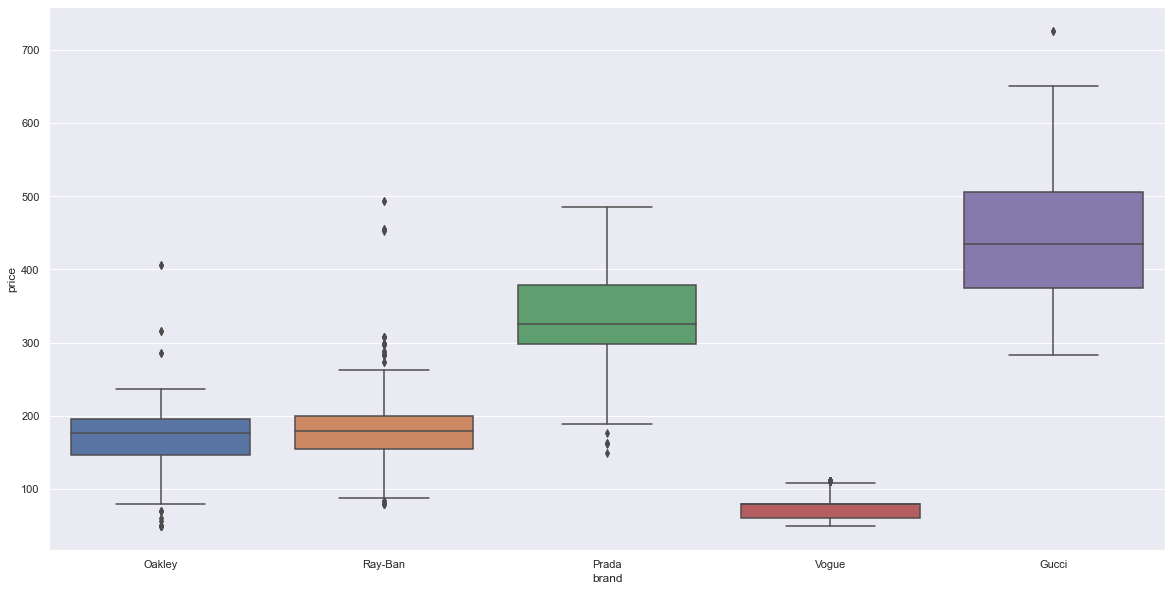

In [64]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x = 'brand', y = 'price', data = df_brands)

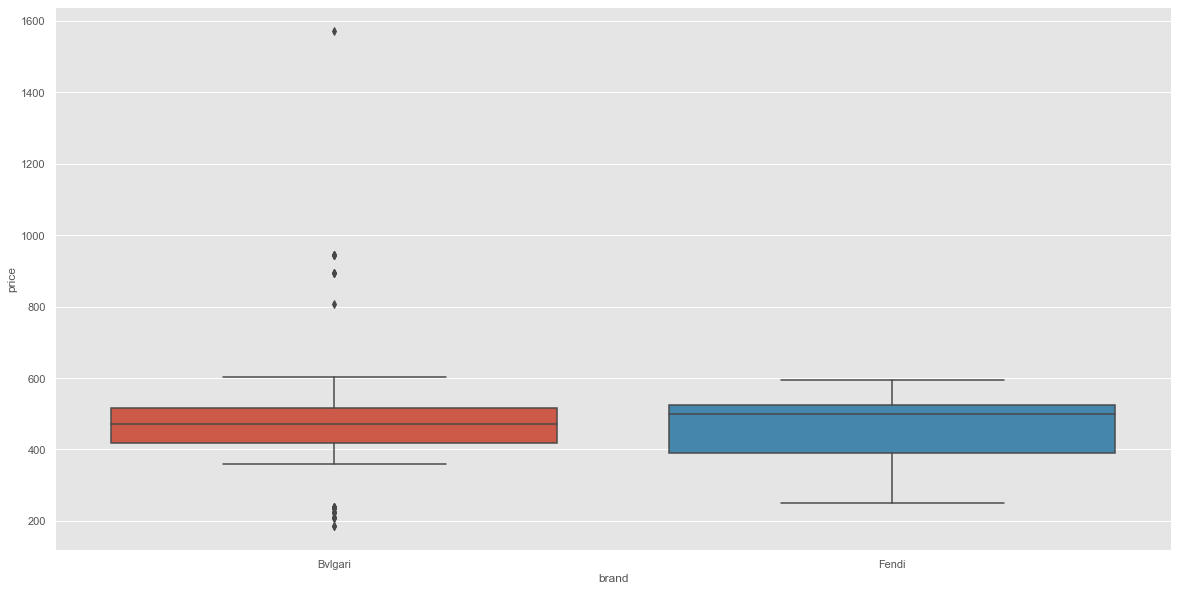

In [147]:
sns.boxplot(x = 'brand', y = 'price', data = df.loc[(df.brand == 'Bvlgari') | (df.brand == 'Fendi')])

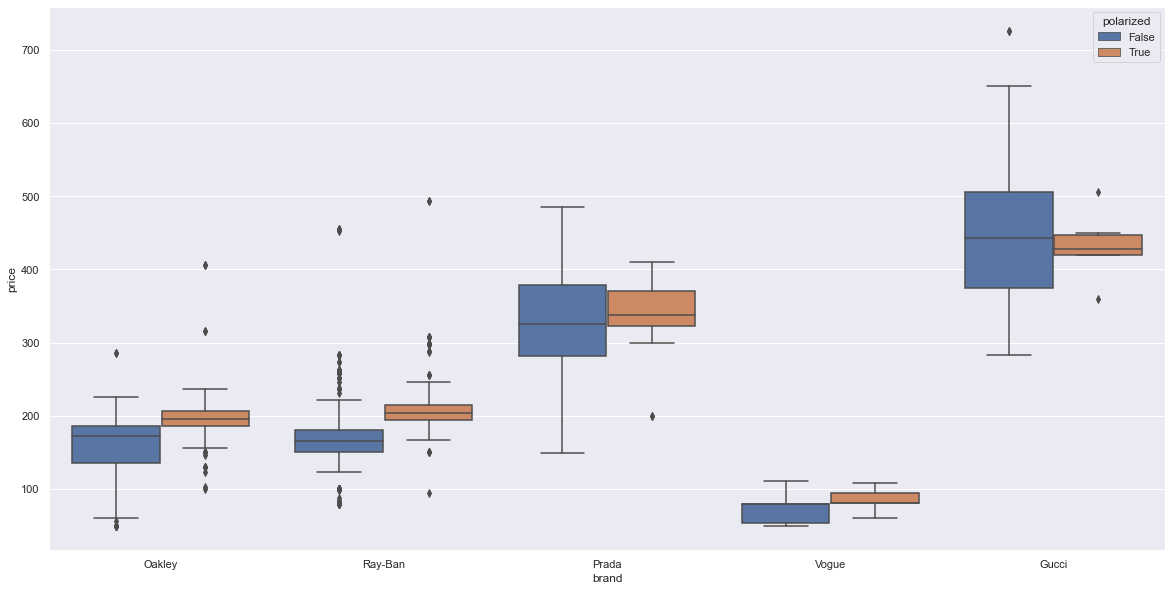

In [65]:
sns.boxplot(x = 'brand', y = 'price', data = df_brands, hue = 'polarized')

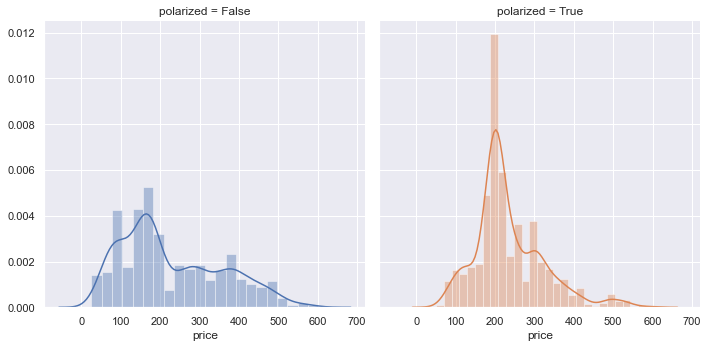

In [66]:
df_most = df.loc[np.abs(df.price-df.price.mean())/df.price.std() < 3]
polarizedGrid = sns.FacetGrid(df_most, col = 'polarized', hue = 'polarized', height = 5)
polarizedGrid.map(sns.distplot,'price')

In [112]:
stats.median_test(df.price[df.polarized == True], df.price[df.polarized == False])

(77.89190920978442,
 1.0883627195044486e-18,
 199.99,
 array([[ 596, 1344],
        [ 377, 1649]]))

In [117]:
stats.kstest(df.price[df.polarized == True], df.price[df.polarized == False])

KstestResult(statistic=0.2856761700562704, pvalue=1.1102230246251565e-15)

In [139]:
stats.kstest?

In [71]:
print('mean price polarized: ',df.price[df.polarized].mean())
print('mean price non-polarized: ',df.price[~df.polarized].mean())
print('median price polarized: ',df.price[df.polarized].median())
print('median price non-polarized: ',df.price[~df.polarized].median())

mean price polarized:  237.96644398766688
mean price non-polarized:  231.172362178416
median price polarized:  215.0
median price non-polarized:  184.0


# Frame color

In [80]:
df_color = pd.DataFrame(df.frame_color.value_counts())[:10]
df_color.reset_index(inplace = True)
df_color.columns = ['color', 'count']
df_color.color.tolist()

['Black',
 'Tortoise',
 'Gold',
 'Matte Black',
 'Silver',
 'Grey',
 'Brown',
 'Gunmetal',
 'Blue',
 'Pink']

In [109]:
#mask = list(map(lambda x: x in df_color.color.tolist(), df.frame_color))
df_color = df[mask].groupby('frame_color')['price'].median()
df_color = pd.DataFrame(df_color).reset_index().sort_values(by = 'price', ascending = False)
df_color

,frame_color,price
2,Brown,249.990
8,Silver,215.500
3,Gold,215.000
5,Gunmetal,215.000
0,Black,211.000
9,Tortoise,204.000
4,Grey,186.500
6,Matte Black,186.000
1,Blue,158.000
7,Pink,126.375


In [110]:
data = [Bar(x=df_color['frame_color'], y=df_color['price'], text=df_color['frame_color'])]
layout = Layout(title="Median price by frame color", yaxis = None)

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

In [121]:
def popular_color(x):
    try:
        return (df.frame_color.value_counts() > 60)[x]
    except:
        return False
mask = list(map(popular_color, df.frame_color))

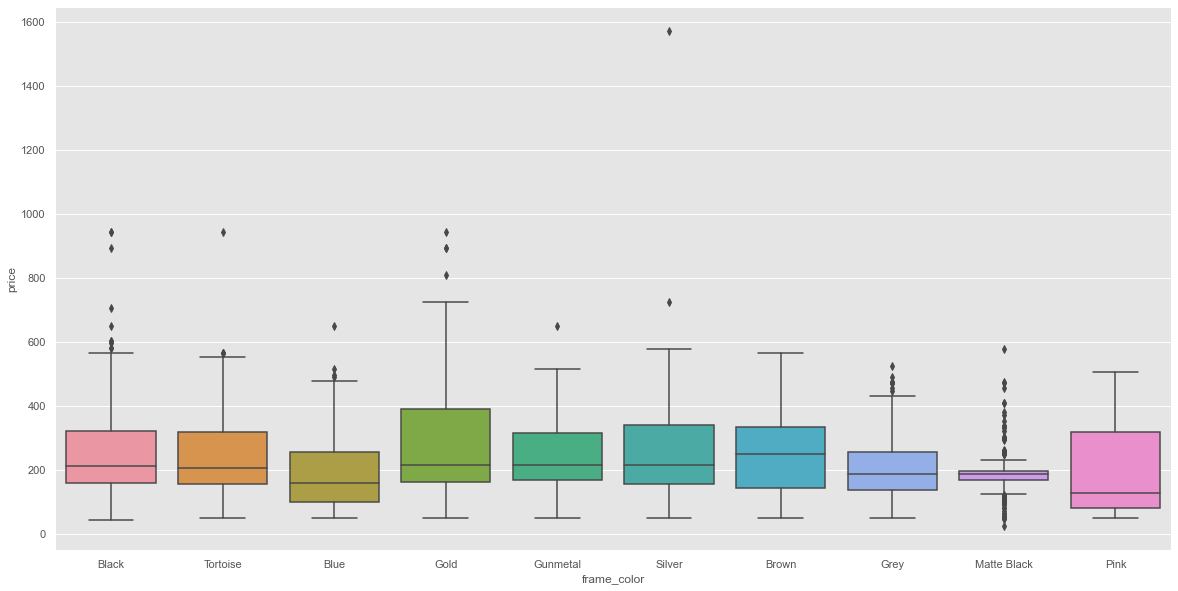

In [124]:
sns.boxplot(x = 'frame_color', y = 'price', data = df[mask])

In [138]:
stats.anderson_ksamp([item[1].values for item in df[mask].groupby('frame_color')['price']])


<ipython-input-138-bcb9ad571ff9>:1: UserWarning:

p-value floored: true value smaller than 0.001



Anderson_ksampResult(statistic=32.35905943630471, critical_values=array([0.58166667, 1.33044444, 1.83077778, 2.29955556, 2.88933333,
       3.32266667, 4.27288889]), significance_level=0.001)

# Face shape

(9605, 2)


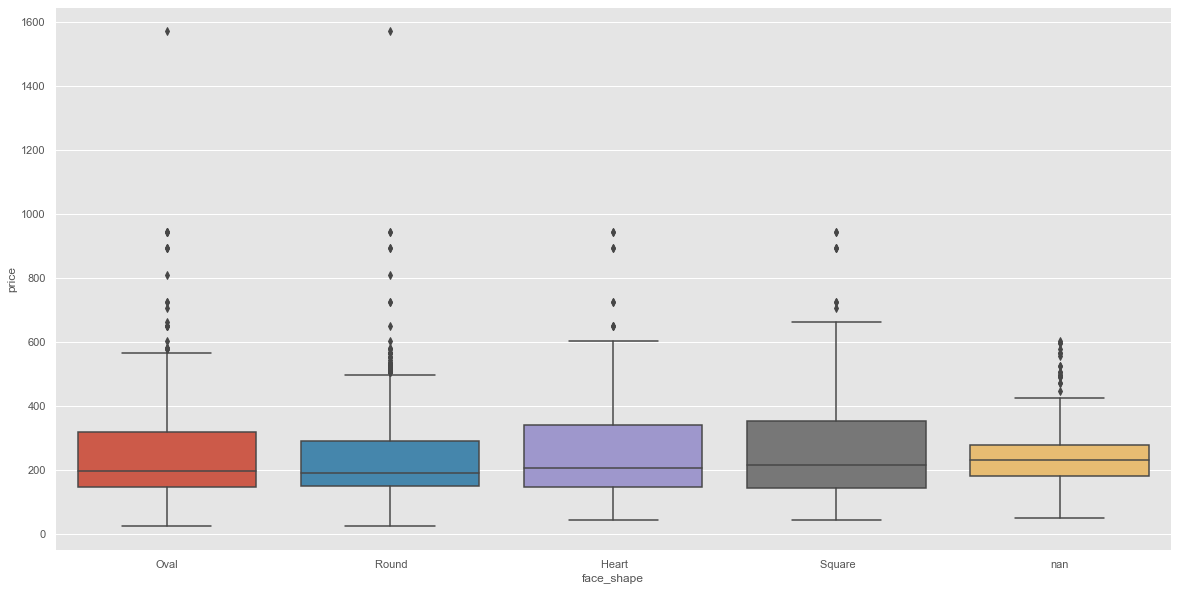

In [119]:
X = (zip(df.face_shape.astype('str').str.split(','), df['price']))
Y = (map(lambda t:list(zip(t[0],[t[1]]*len(t[0]))), X))
a, b = zip(*sum(Y,[]))  # flatten the list
Z = pd.DataFrame({'face_shape':a,'price':b})
print(Z.shape)
# Z.groupby('face_shape').plot(kind='box', color='b')
sns.boxplot(x = 'face_shape', y = 'price', data = Z)

(9558, 2)


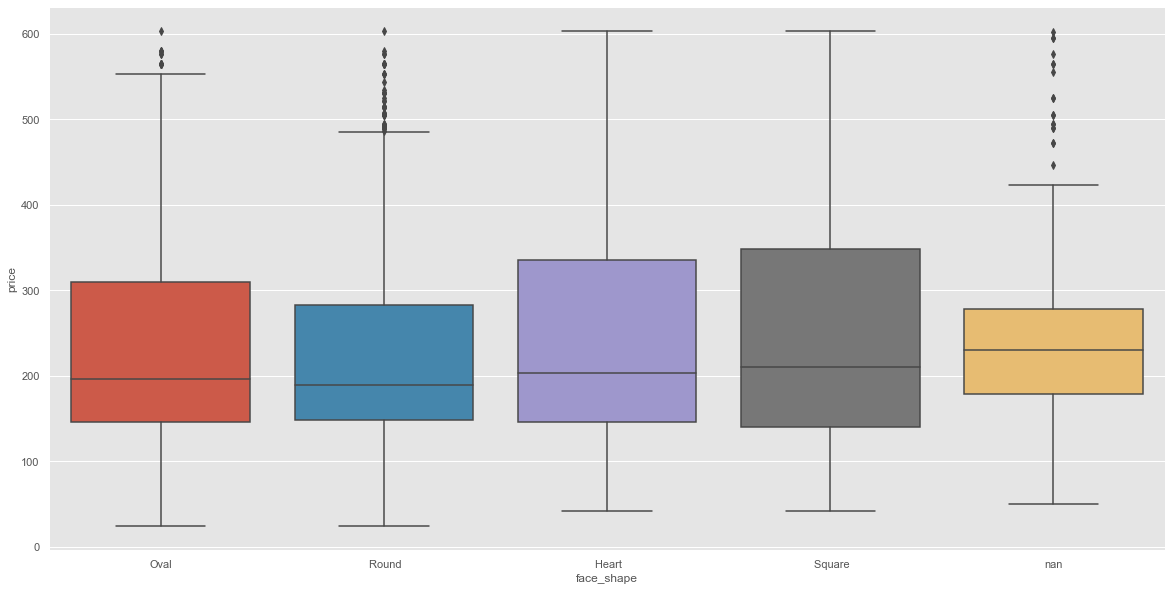

In [120]:
X = (zip(df_most.face_shape.astype('str').str.split(','), df_most['price']))
Y = (map(lambda t:list(zip(t[0],[t[1]]*len(t[0]))), X))
a, b = zip(*sum(Y,[]))  # flatten the list
Z = pd.DataFrame({'face_shape':a,'price':b})
print(Z.shape)
# Z.groupby('face_shape').plot(kind='box', color='b')
sns.boxplot(x = 'face_shape', y = 'price', data = Z)

# Woot!

In [101]:
woot = pd.read_csv('woot_sunglasses.csv')
pd.set_option('display.max_colwidth', 150)

In [98]:
def extract_name(x):
    try:
        return re.search('[a-zA-Z]+\d+\w*',x).group().lower()
    except:
        return None

In [99]:
woot['key_'] = list(map(extract_name,woot.title))
df['key_'] = list(map(extract_name,df.name))
df_woot = pd.merge(df.loc[map(lambda x: bool(x), df.key_)], woot.loc[map(lambda x: bool(x), woot.key_)], on = 'key_', suffixes = ('_hut','_woot'))

In [106]:
df_woot[['name','price_hut', 'price_woot','url_hut', 'url_woot']].sort_values(by = 'url_woot').head(20)

,name,price_hut,price_woot,url_hut,url_woot
43,OO4124 Gauge™ 8,226.00,$97.99,https://www.sunglasshut.com/us/oakley/oo4124-888392271389,https://sport.woot.com/offers/oakley-oo4124-gauge-8-polarized-3?ref=w_cnt_lnd_cat_sprt_4_50
44,OO4124 Gauge™ 8,226.00,$97.99,https://www.sunglasshut.com/us/oakley/oo4124-888392271334,https://sport.woot.com/offers/oakley-oo4124-gauge-8-polarized-3?ref=w_cnt_lnd_cat_sprt_4_50
39,OO9331 Straightlink™,206.00,$75.99,https://www.sunglasshut.com/us/oakley/oo9331-888392228901,https://sport.woot.com/offers/oakley-oo9331-straightlink-sunglasses-1?ref=w_cnt_lnd_cat_sprt_4_27
0,RB2140 ORIGINAL WAYFARER CLASSIC,204.00,$69.99,https://www.sunglasshut.com/us/ray-ban/rb2140-805289126591,https://sport.woot.com/offers/ray-ban-rb2140-original-wayfarer-sunglasses-2?ref=w_cnt_lnd_cat_sprt_4_13
1,RB2140 ORIGINAL WAYFARER CLASSIC,204.00,$69.99,https://www.sunglasshut.com/us/ray-ban/rb2140-805289346944,https://sport.woot.com/offers/ray-ban-rb2140-original-wayfarer-sunglasses-2?ref=w_cnt_lnd_cat_sprt_4_13
2,RB2140 ORIGINAL WAYFARER CLASSIC,154.00,$69.99,https://www.sunglasshut.com/us/ray-ban/rb2140-805289126577,https://sport.woot.com/offers/ray-ban-rb2140-original-wayfarer-sunglasses-2?ref=w_cnt_lnd_cat_sprt_4_13
3,RB2140 ORIGINAL WAYFARER CLASSIC,154.00,$69.99,https://www.sunglasshut.com/us/ray-ban/rb2140-805289126638,https://sport.woot.com/offers/ray-ban-rb2140-original-wayfarer-sunglasses-2?ref=w_cnt_lnd_cat_sprt_4_13
4,RB2140 WAYFARER POP,149.99,$69.99,https://www.sunglasshut.com/us/ray-ban/rb2140-8053672926477,https://sport.woot.com/offers/ray-ban-rb2140-original-wayfarer-sunglasses-2?ref=w_cnt_lnd_cat_sprt_4_13
5,RB2140 WAYFARER POP,149.99,$69.99,https://www.sunglasshut.com/us/ray-ban/rb2140-8053672926446,https://sport.woot.com/offers/ray-ban-rb2140-original-wayfarer-sunglasses-2?ref=w_cnt_lnd_cat_sprt_4_13
6,RB2140 Mickey M90th,204.00,$69.99,https://www.sunglasshut.com/us/ray-ban/rb2140-8056597034296,https://sport.woot.com/offers/ray-ban-rb2140-original-wayfarer-sunglasses-2?ref=w_cnt_lnd_cat_sprt_4_13
